# Part I - Exploration of the Ford GoBike System Data
## by Sky Adams

## Introduction

The data used in this exploration comes from a bike share system in the greater San Francisco Bay area. It includes information about 183,412 rides, including when and where the ride started and stopped, what bike was used, and the birth year, gender, and type of user of the rider, and whether or not the rider was part of the bike share for all program, which helps lower income residents afford the bike share.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.shape

(183412, 16)

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].map({'Yes': True, 'No': False})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

There are 183,412 rides documented in the dataset with 16 features. After data wrangling, most features are numeric, but there are also boolean, categorical, datetime, and text features.

### What is/are the main feature(s) of interest in your dataset?

I want to look at the distribution of gender and birth year and how the usage of the bike sharing system varies according to demographics. This could potentially help identify areas of the market that are undertapped or the pressence of barriers to using the bike share for certain populations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Gender, birth year, bike share for all, and ride duration will likely be the most useful features for this investigation.

## Univariate Exploration

What is the distribution of birth years among members?

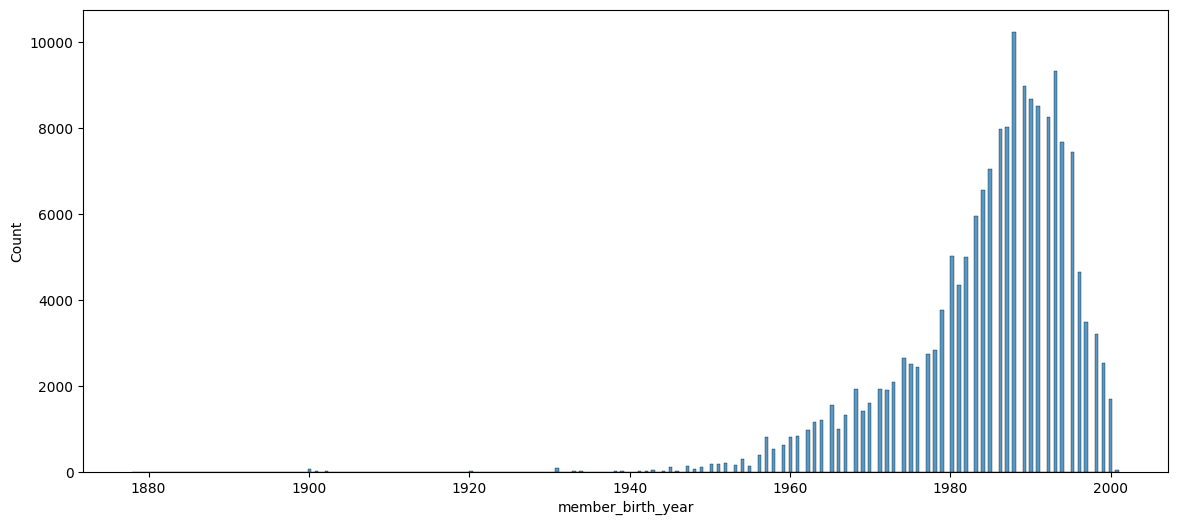

In [6]:
plt.figure(figsize=[14,6]);
sns.histplot(data=df,x='member_birth_year');

It looks like there may be some incorrect birth years in the data as it is not realistic for someone born in 1880 to be riding a bike in the 2000s. We should look for outliers in the data.

In [7]:
old_riders = df[df['member_birth_year'] < 1920]
old_riders['member_birth_year'].value_counts()

member_birth_year
1900.0    53
1902.0    11
1901.0     6
1878.0     1
1910.0     1
Name: count, dtype: int64

In [8]:
old_riders['start_time'].dt.year.value_counts()

start_time
2019    72
Name: count, dtype: int64

In 2019, the oldest living person in the world was born in 1903. So, we should remove the rides that ostensibly occurred in 2019 by people born before 1903.

In [9]:
df = df[df['member_birth_year'] >= 1903]
df['member_birth_year'].value_counts().sort_index()

member_birth_year
1910.0       1
1920.0       3
1927.0       1
1928.0       1
1930.0       1
          ... 
1997.0    3481
1998.0    3208
1999.0    2528
2000.0    1678
2001.0      34
Name: count, Length: 71, dtype: int64

The oldest rider was 80 years old at the time of their ride, which is reasonable.  
Now visualize the age distribution again with the incorrect data removed.

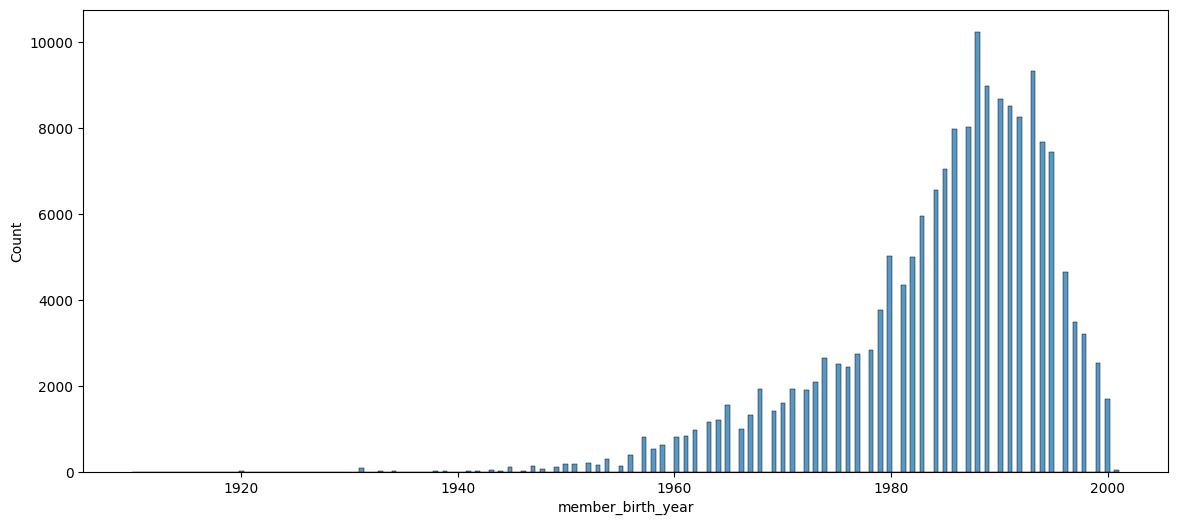

In [10]:
plt.figure(figsize=[14,6]);
sns.histplot(data=df,x='member_birth_year');

Most riders were born between 1980 and 2000, with the peak being around 1990. The distribution appears to be exponential up until 1990.

What is the distribution of gender among members of the bikeshare program?

member_gender
Male      130594
Female     40830
Other       3652
Name: count, dtype: int64

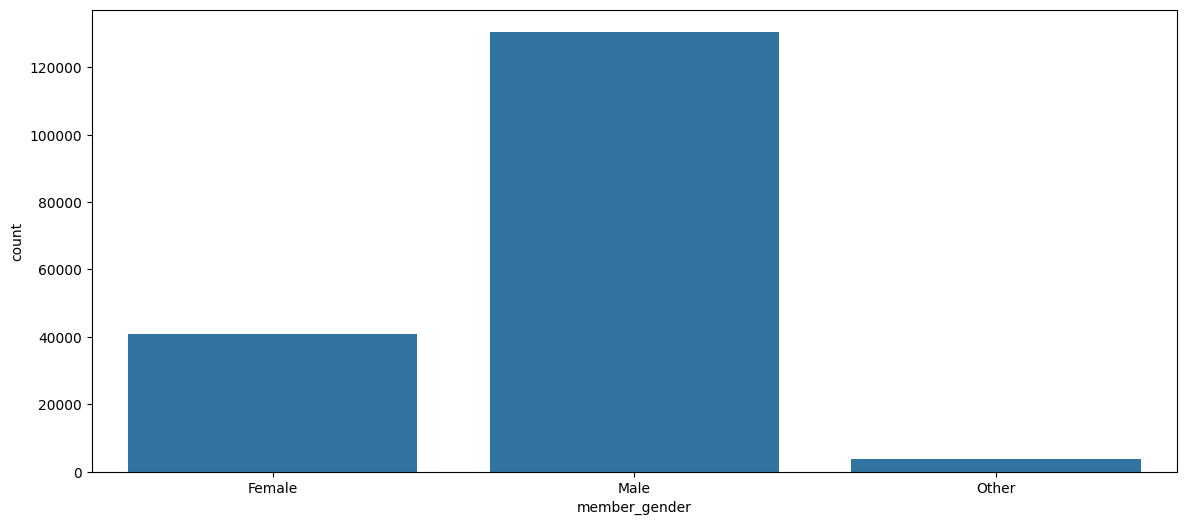

In [11]:
plt.figure(figsize=[14,6]);
sns.countplot(data=df,x='member_gender');
df['member_gender'].value_counts() #It's useful to have the raw numbers as well.

There are more than 3 times as many male members as female members. There are a small number of members who are neither female nor male.

Now look at the distribution of ride durations.

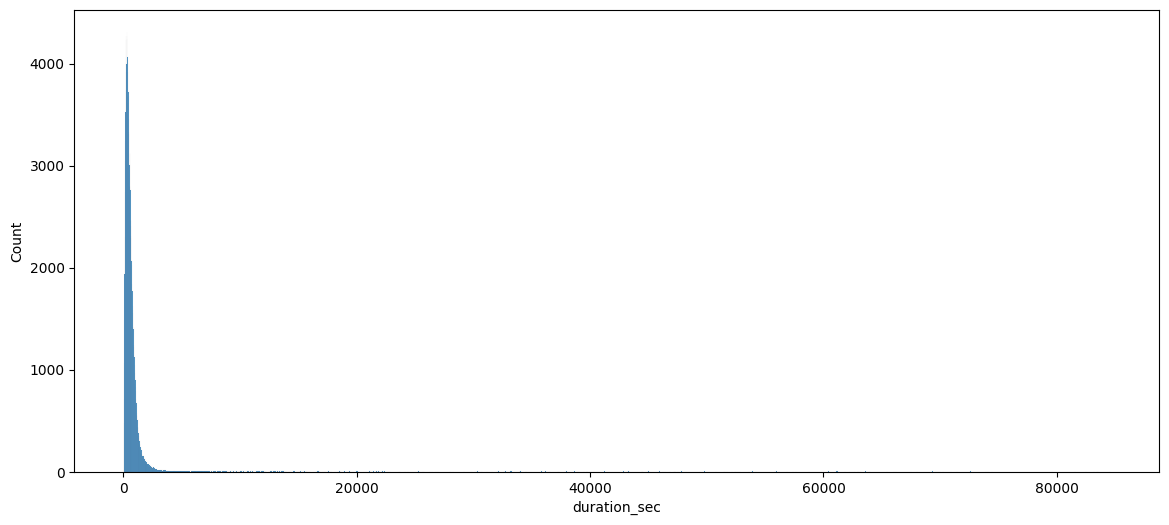

In [12]:
plt.figure(figsize=[14,6]);
sns.histplot(data=df,x='duration_sec');

There appears to be either a long tail or a few outliers. Use a log scale to investigate this.

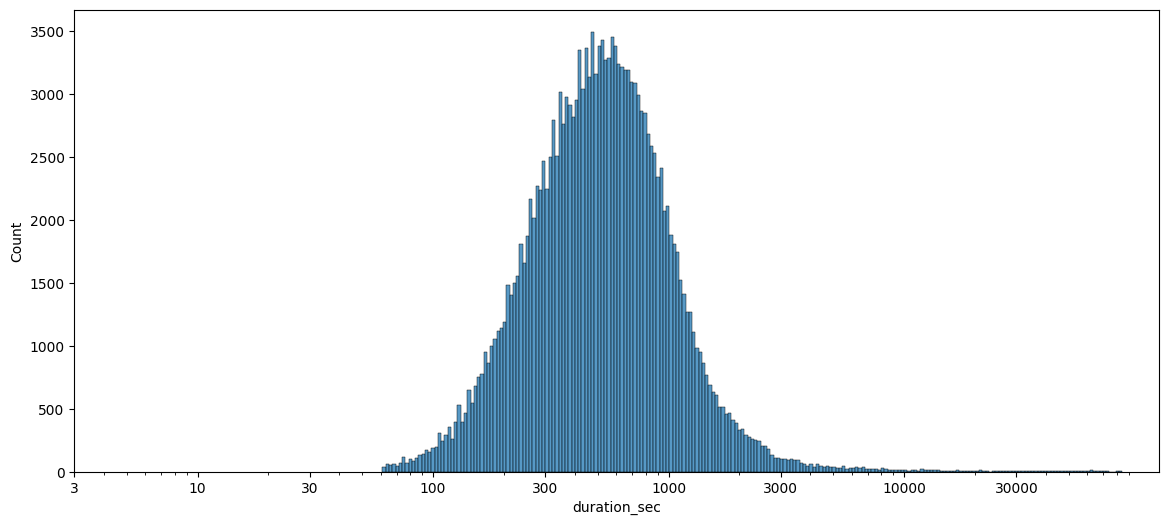

In [13]:
ticks=[3,10,30,100,300,1000,3000,10000,30000]
plt.figure(figsize=[14,6]);
ax = sns.histplot(data=df, x='duration_sec',log_scale=True);
ax.set_xticks(ticks);
ax.set_xticklabels(ticks);

On a log scale, the distribution of ride durations looks approximately normal with the peak around 600 seconds (10 minutes).

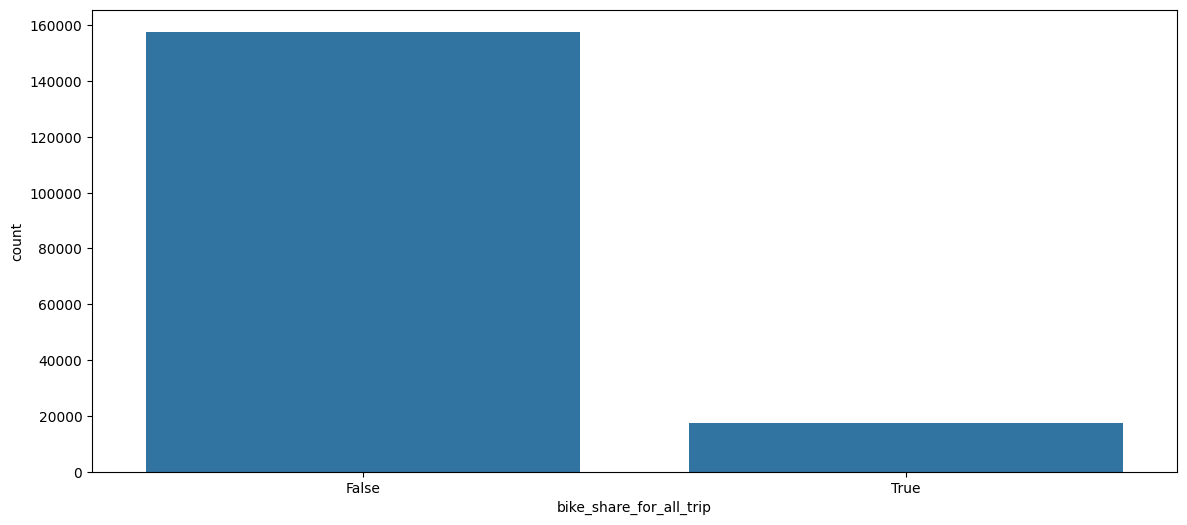

In [14]:
plt.figure(figsize=[14,6]);
sns.countplot(data=df,x='bike_share_for_all_trip');

Since there are only two categories that have very different values, we can use a pie chart without misleading viewers.

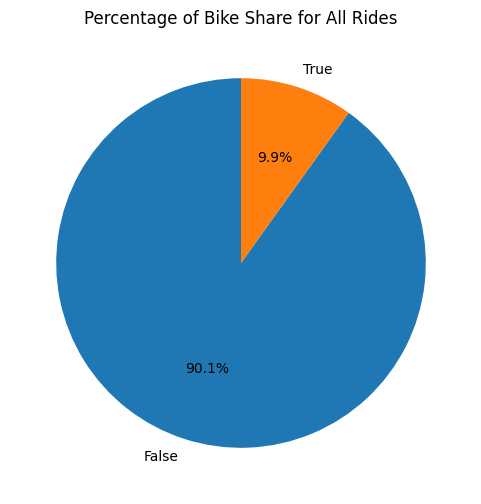

In [15]:
counts = df['bike_share_for_all_trip'].value_counts()
plt.figure(figsize=[14,6]);
plt.pie(counts, labels=counts.index, autopct='%.1f%%', startangle=90);
plt.title('Percentage of Bike Share for All Rides');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There were unusual points in the birth year column, which we removed since they couldn't possibly be accurate. We converted some of the data types to more appropraite data types, such as converting times to datetime objects, yes/no values to booleans, and categrocial variables to the categorical data type rather than the object data type.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of genders is significant as it shows that about 75% of rides are done by males. It is unclear if 75% of members are male or if the membership distribution is different. There is no way to know this without having a unique id for each member, but we can say that men use the rideshare service more than women.  
We also noted that most members were born between 1980 and 2000 and that the distribution of ride times is approximately lognormal.  
Lastly, we saw that about 10% of rides were part of the Bike Share for All program.

## Bivariate Exploration

Explore the relationship between gender and birth year.

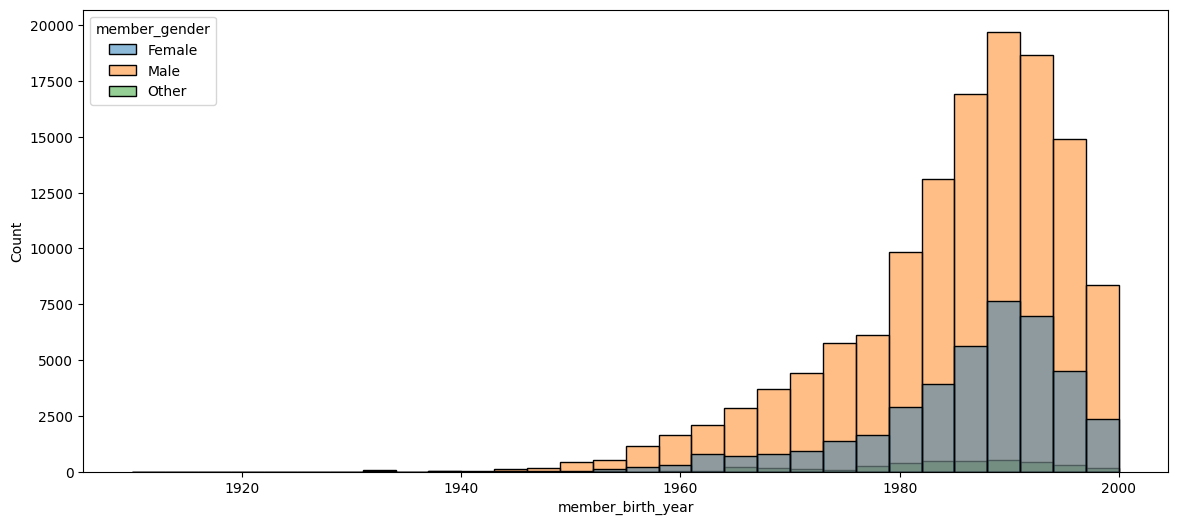

In [16]:
bins = np.arange(df['member_birth_year'].min(),df['member_birth_year'].max(),3)
plt.figure(figsize=[14,6]);
sns.histplot(data=df, x='member_birth_year', hue='member_gender',bins=bins);

The distributions of rides completed by males and females looks fairly similar across all birth years; however, there seems to be comparatively fewer rides completed by females born in the 1960s and 1970s. We can explore this forther by plotting the ratio of rides completed by males to rides completed by females for each birth year. We saw earlier that the ratio of across all rides is a little over 3 to 1.  
The distribution of riders with a non-binary gender is not very meaningful as there are so few data points in this category.

In [17]:
def plot_gender_counts_by_year(data):
    plt.figure(figsize=[14,6]);
    ax = sns.barplot(data=data, x='member_birth_year', y='ratio')
    current_ticks = ax.get_xticks()
    current_labels = ax.get_xticklabels()
    selected_ticks = current_ticks[::4]
    selected_labels = [label.get_text() for label in current_labels[::4]]
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels, rotation=45, ha='right');

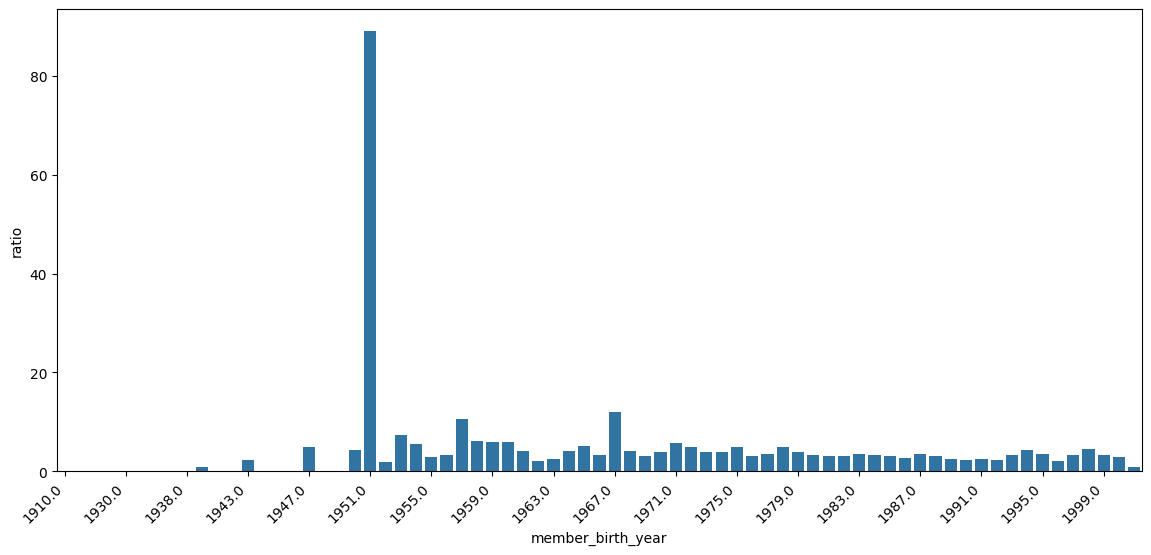

In [18]:
gender_counts_by_year = df.groupby(['member_birth_year', 'member_gender'],observed=False).size().unstack(fill_value=0)
gender_counts_by_year['ratio'] = gender_counts_by_year['Male'] / gender_counts_by_year['Female']
plot_gender_counts_by_year(gender_counts_by_year)

We see that the year 1951 has a much higher ration than other years. However, as we saw earlier, there are very few data points for rides completed by riders born in the early 1950s. We can see exactlly how few below.

In [19]:
df[df['member_birth_year'] == 1951]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
2075,432,2019-02-28 18:25:58.871,2019-02-28 18:33:11.351,171.0,Rockridge BART Station,37.844279,-122.251900,210.0,45th St at Manila,37.833294,-122.256224,3433,Subscriber,1951.0,Male,False
2314,294,2019-02-28 18:14:31.459,2019-02-28 18:19:25.939,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,171.0,Rockridge BART Station,37.844279,-122.251900,3433,Subscriber,1951.0,Male,False
2760,1078,2019-02-28 17:39:24.354,2019-02-28 17:57:23.093,10.0,Washington St at Kearny St,37.795393,-122.404770,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4655,Subscriber,1951.0,Male,False
2766,561,2019-02-28 17:47:39.151,2019-02-28 17:57:00.174,245.0,Downtown Berkeley BART,37.870139,-122.268422,262.0,West St at University Ave,37.869967,-122.286533,4667,Customer,1951.0,Male,False
2908,858,2019-02-28 17:37:18.044,2019-02-28 17:51:36.259,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,5568,Customer,1951.0,Male,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175139,943,2019-02-02 15:10:50.335,2019-02-02 15:26:33.452,368.0,Myrtle St at Polk St,37.785434,-122.419622,73.0,Pierce St at Haight St,37.771793,-122.433708,2648,Subscriber,1951.0,Male,False
176054,778,2019-02-02 12:34:40.089,2019-02-02 12:47:38.456,73.0,Pierce St at Haight St,37.771793,-122.433708,368.0,Myrtle St at Polk St,37.785434,-122.419622,5113,Subscriber,1951.0,Male,False
179666,181,2019-02-01 13:12:19.724,2019-02-01 13:15:21.716,114.0,Rhode Island St at 17th St,37.764478,-122.402570,101.0,15th St at Potrero Ave,37.767079,-122.407359,5453,Subscriber,1951.0,Male,False
179712,172,2019-02-01 13:04:47.038,2019-02-01 13:07:39.446,101.0,15th St at Potrero Ave,37.767079,-122.407359,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5453,Subscriber,1951.0,Male,False


In [20]:
df['member_birth_year'].value_counts()

member_birth_year
1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1934.0        2
1928.0        1
1930.0        1
1910.0        1
1927.0        1
Name: count, Length: 71, dtype: int64

In [21]:
df['member_birth_year'].value_counts().mean()

2465.8591549295775

On average, there are 2,465 rides for each birth year. However, there are only 180 rides completed by members born in 1951. So, the ratio of male to female rides is not a realiable statistic for that year.  
We can plot the ratio again and only include years for which we have at least 30 rides completed by females.

In [22]:
gender_count_subset = gender_counts_by_year[gender_counts_by_year['Female'] >= 30]
gender_count_subset

member_gender,Female,Male,Other,ratio
member_birth_year,,,,
1950.0,33,145,0,4.393939
1952.0,59,108,22,1.830508
1954.0,46,255,0,5.543478
1955.0,34,100,0,2.941176
1956.0,92,300,0,3.260870
1957.0,70,737,0,10.528571
1958.0,73,444,0,6.082192
1959.0,90,525,9,5.833333
1960.0,117,685,5,5.854701


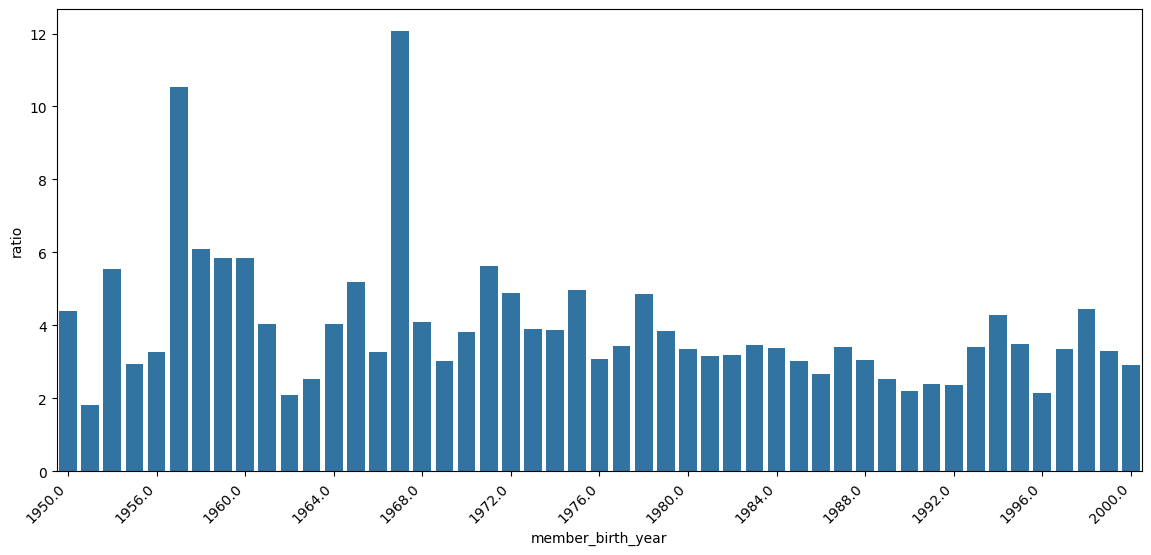

In [23]:
plot_gender_counts_by_year(gender_count_subset)

We see that there is actually a fair amount of variability in the ratio of rides completed by males to rides completed by females. The general trend is that the ratio decreases with later birth years, although it picks back up slightly among riders born in the 1990s. A lower ratio indicates that there is less disparity between the number of rides completed by men and the number of rides completed by women.

Now explore the relationship between ride duration and gender.

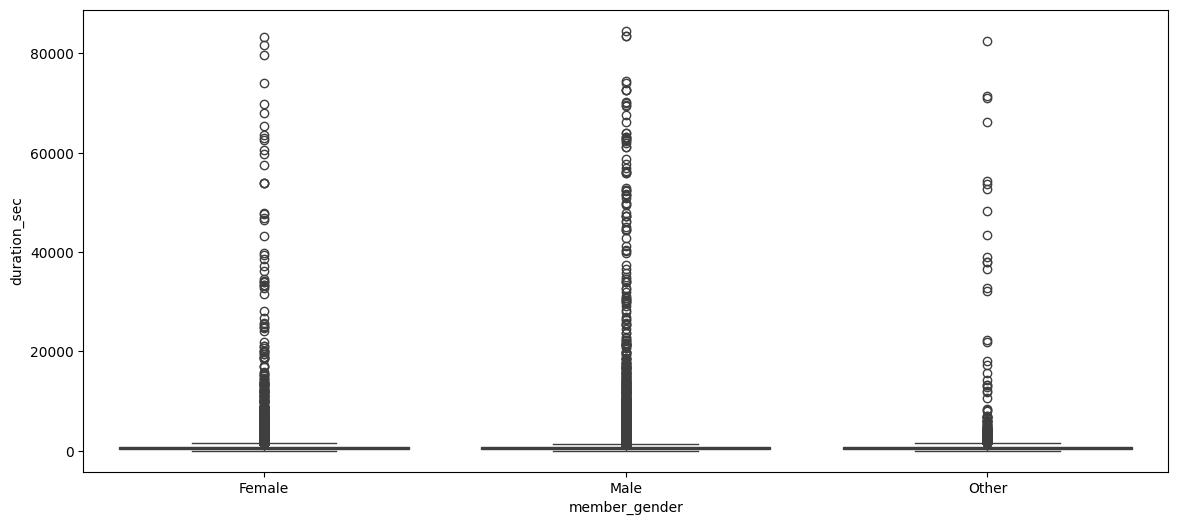

In [24]:
plt.figure(figsize=[14,6]);
sns.boxplot(data=df,x='member_gender',y='duration_sec');

Across all genders there are many outliers representing much longer rides, with the longest being over 80,000 seconds (over 22 hours). To see the main part of the boxplots better, we plot it again with the outliers excluded.

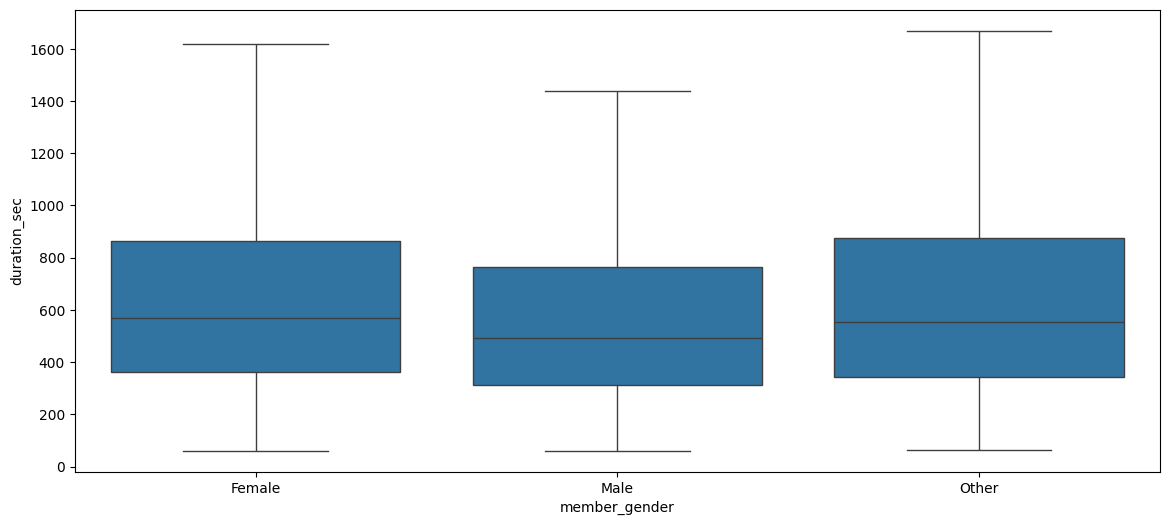

In [25]:
plt.figure(figsize=[14,6]);
sns.boxplot(data=df,x='member_gender',y='duration_sec', showfliers=False);

The plots for females and other genders look almost identical. However, it is important to remember that there are few datapoints for "other," so we should be careful about how we interpret the data. Rides completed by females were slightly longer, on average, than rides completed by males, but there was much more variance in their length. We should investigate with a violin plot as well to make sure we aren't missing any other differences.

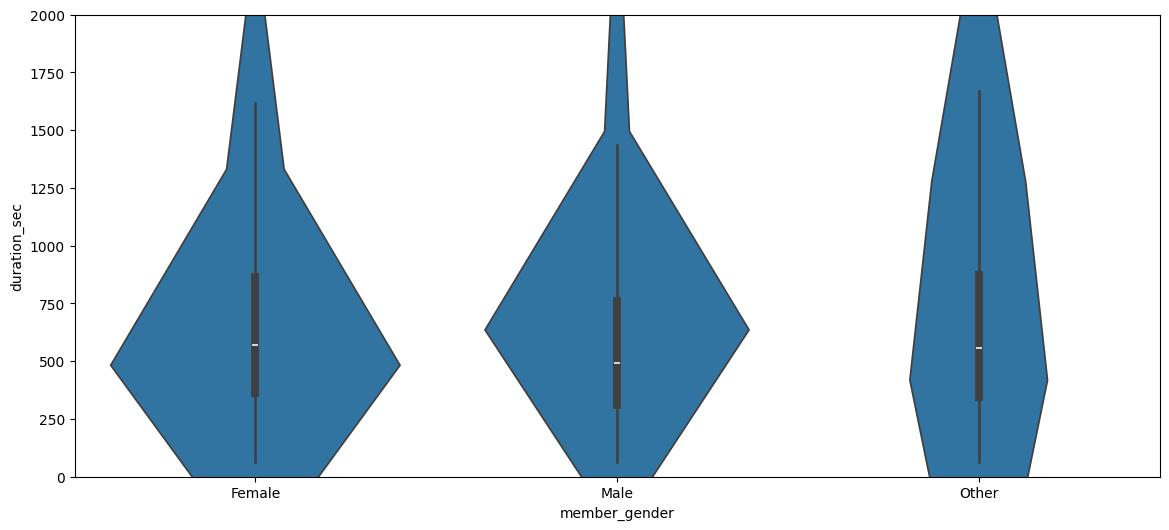

In [26]:
plt.figure(figsize=[14,6]);
ax = sns.violinplot(data=df,x='member_gender',y='duration_sec');
ax.set_ylim(ymin = 0, ymax=2000); #only show the portion of interest

We can see that the distributions are unimodal.

Now explore the relationship between member birth year and length of ride.

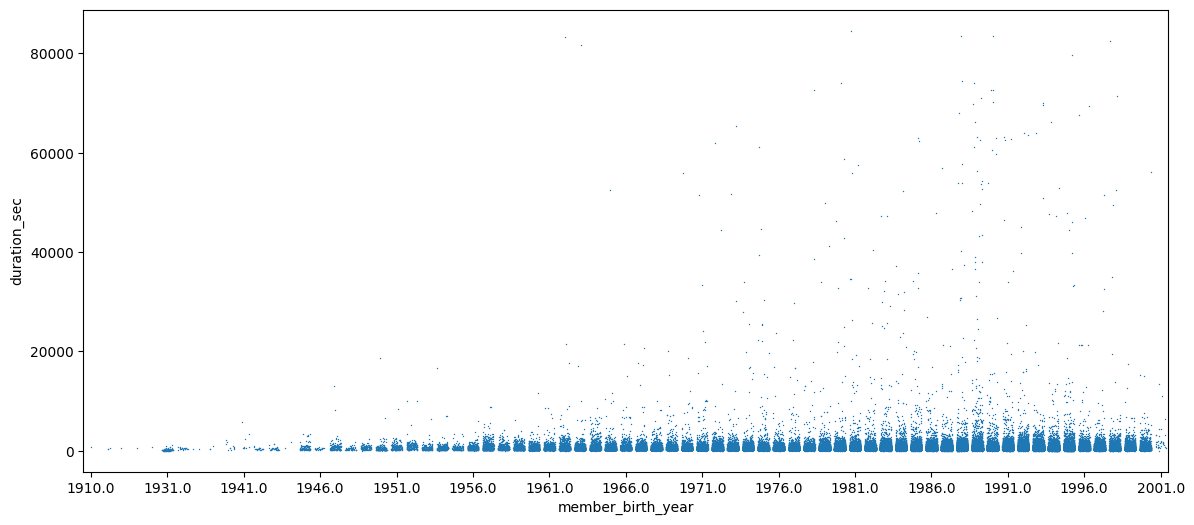

In [27]:
plt.figure(figsize=[14,6]);
ax = sns.stripplot(data=df, x='member_birth_year', y='duration_sec', size=1, jitter=0.35);
locs, labels = plt.xticks()
ax.set_xticks(locs[::5])
ax.set_xticklabels(labels[::5]);

We can see that while most rides for all ages tend to be shorter, younger riders are more likely than older riders to go on long rides.  
Now look at the same plot with outliers (calculated as those above the 95th percentile) removed.

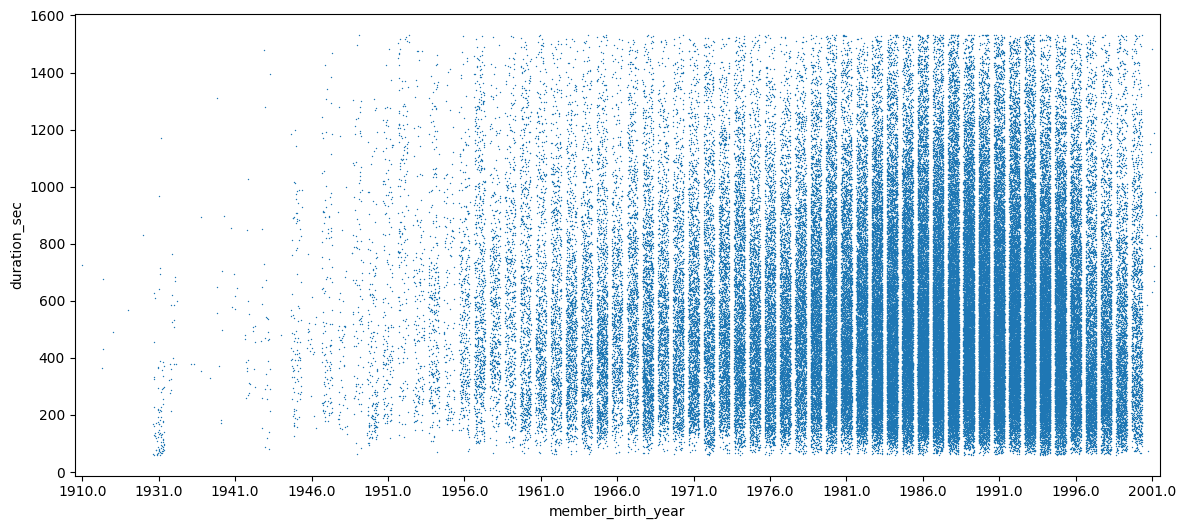

In [28]:
plt.figure(figsize=[14,6]);
ax = sns.stripplot(data=df[df['duration_sec'] <= df['duration_sec'].quantile(.95)], x='member_birth_year', y='duration_sec', size=1, jitter=0.35);
locs, labels = plt.xticks()
ax.set_xticks(locs[::5])
ax.set_xticklabels(labels[::5]);

We can see that the distribution of ride durations is left skewed.

Now look at the gender distribution among only the bike share for all rides.

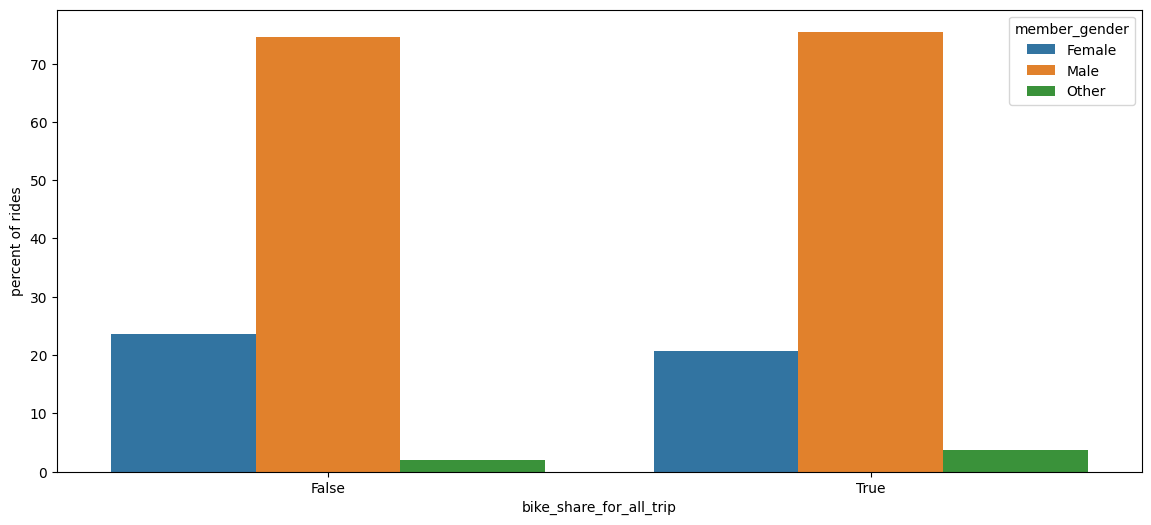

In [29]:
percentages = df.groupby('bike_share_for_all_trip')['member_gender'].value_counts(normalize=True)*100
percentages = percentages.reset_index()
plt.figure(figsize=[14,6]);
sns.barplot(data=percentages, x='bike_share_for_all_trip', hue='member_gender', y='proportion');
plt.ylabel('percent of rides');

The percentage of rides completed by female and male riders is basically the same regardless of whether or not the rider was part of the Bike Share for all program. There is a slight difference in percentage of rides for those with gender labeled as "Other," but there are few data points for that gender category.

Now look at the relationship between birth year and participation in the Bike Share for All program.

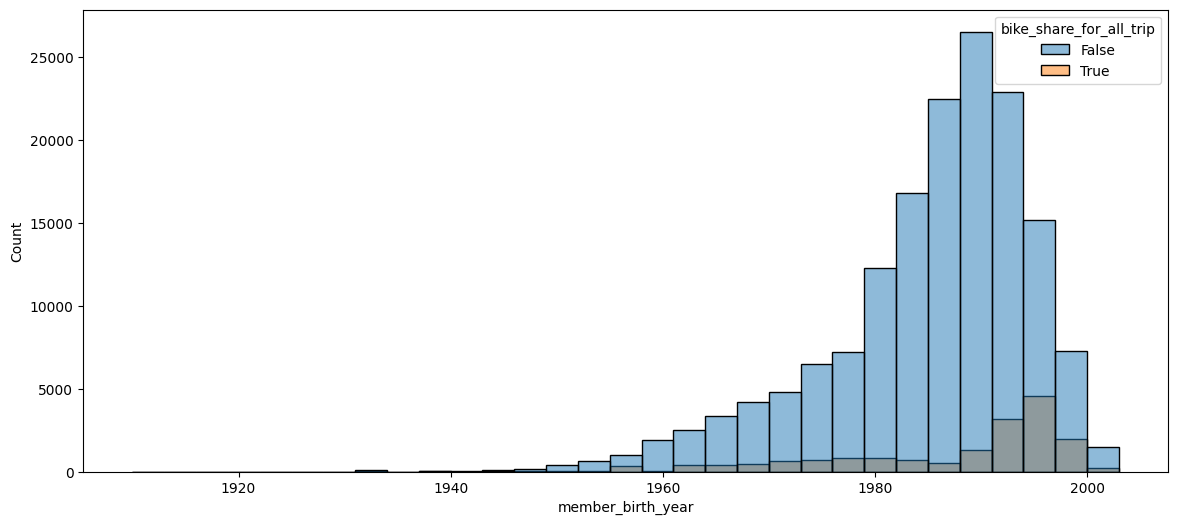

In [30]:
bins = np.arange(df['member_birth_year'].min(),df['member_birth_year'].max()+3,3)
plt.figure(figsize=[14,6]);
sns.histplot(data=df,x='member_birth_year',hue='bike_share_for_all_trip', bins=bins);

We can see that more recent birth years have the most participants, but it is difficult to see exactly what the participation percentage is for each year.

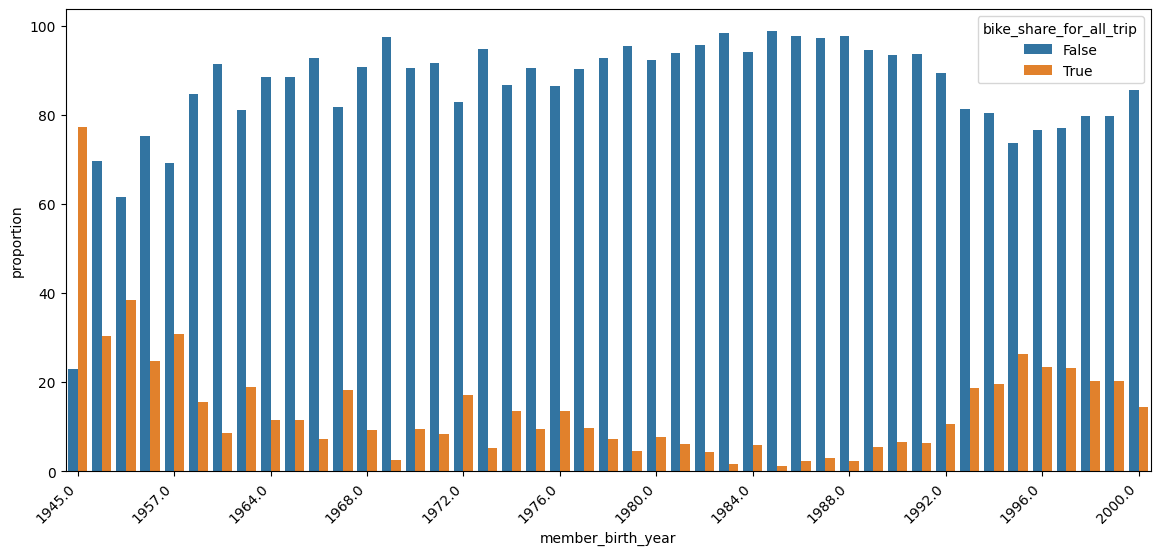

In [31]:
#To reduce noise, only plot years in which there are at least 30 rides that are part of the Bike Share for All program
enough_bike_share_members = df.groupby(['member_birth_year','bike_share_for_all_trip'], as_index=False)['bike_share_for_all_trip'].size()
enough_bike_share_members = enough_bike_share_members[enough_bike_share_members['bike_share_for_all_trip'] == True]
enough_bike_share_members = enough_bike_share_members[enough_bike_share_members['size'] >= 30 ]
percentages = df.groupby('member_birth_year')['bike_share_for_all_trip'].value_counts(normalize=True)*100
percentages = percentages.reset_index()
percentages = percentages[percentages['member_birth_year'].isin(enough_bike_share_members['member_birth_year'])]
plt.figure(figsize=[14,6]);
ax = sns.barplot(data=percentages, x='member_birth_year',y='proportion', hue='bike_share_for_all_trip')
#reduce number of labels on x axis to make it readable
current_ticks = ax.get_xticks()
current_labels = ax.get_xticklabels()
selected_ticks = current_ticks[::4]
selected_labels = [label.get_text() for label in current_labels[::4]]
ax.set_xticks(selected_ticks)
ax.set_xticklabels(selected_labels, rotation=45, ha='right');

We see that the oldest and youngest riders participate in the Bike Share for All program the most. The lowest participation rate is among those born in the 1980s. We would need data on income by birth year for the bay area to know if this is just a product of the demographics or if people born in the 1980s are less likely to participate in the program for other reasons.  
We can also see that although riders born in the 1990s have higher rates of participation in the program, there is a decline in participation rates from the mid 1990s to 2000.

Now explore the relationship between the length of rides andd participation in the Bike Share for All program.

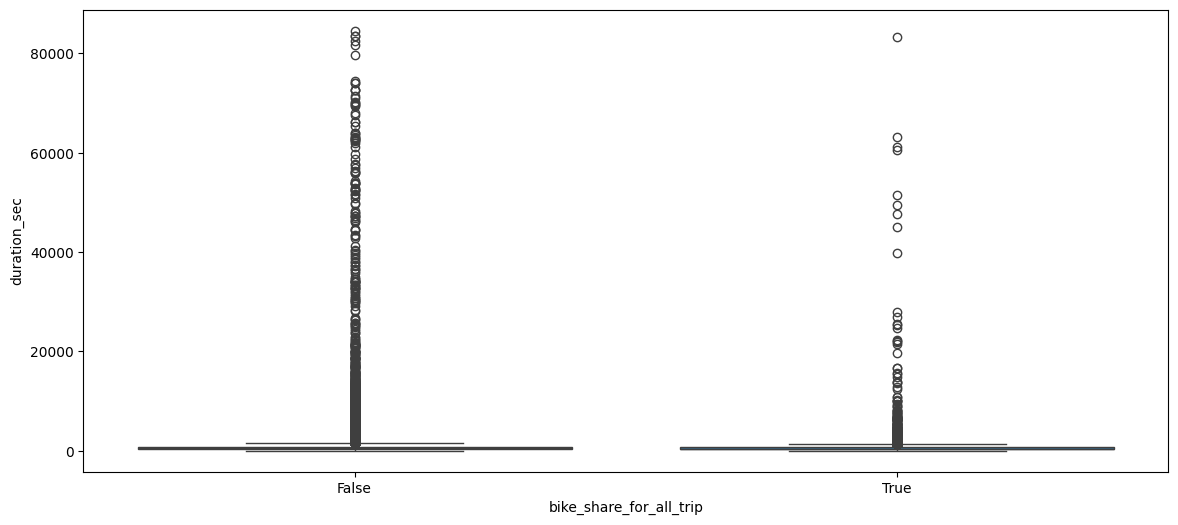

In [32]:
plt.figure(figsize=[14,6]);
sns.boxplot(data=df,x='bike_share_for_all_trip',y='duration_sec');

We can see that there are fewer outliers among the rides that were part of the Bike Share for All trip. Now remove outliers from the plots to see the main distributions.

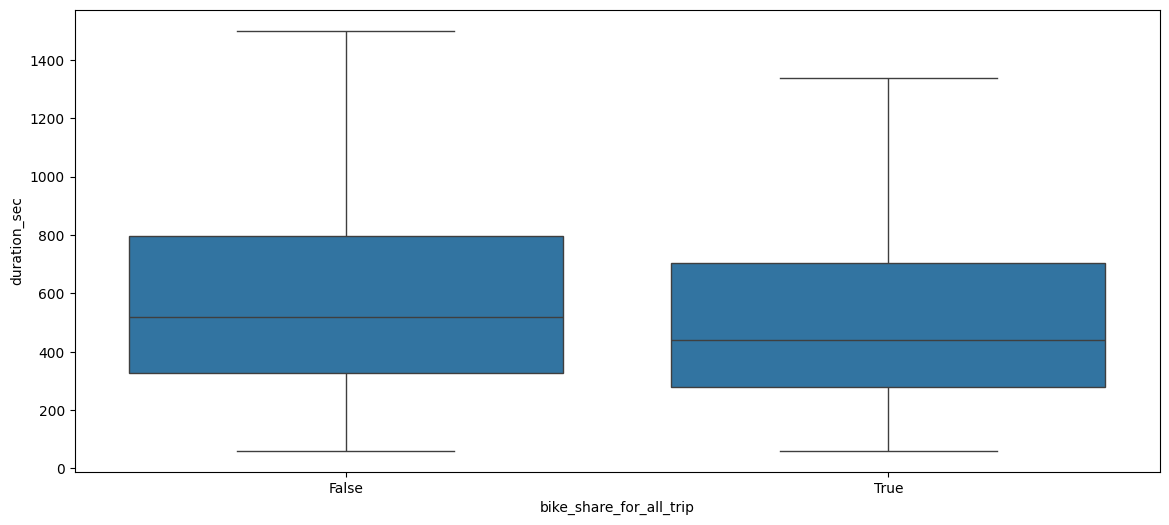

In [33]:
plt.figure(figsize=[14,6]);
sns.boxplot(data=df,x='bike_share_for_all_trip',y='duration_sec',showfliers=False);

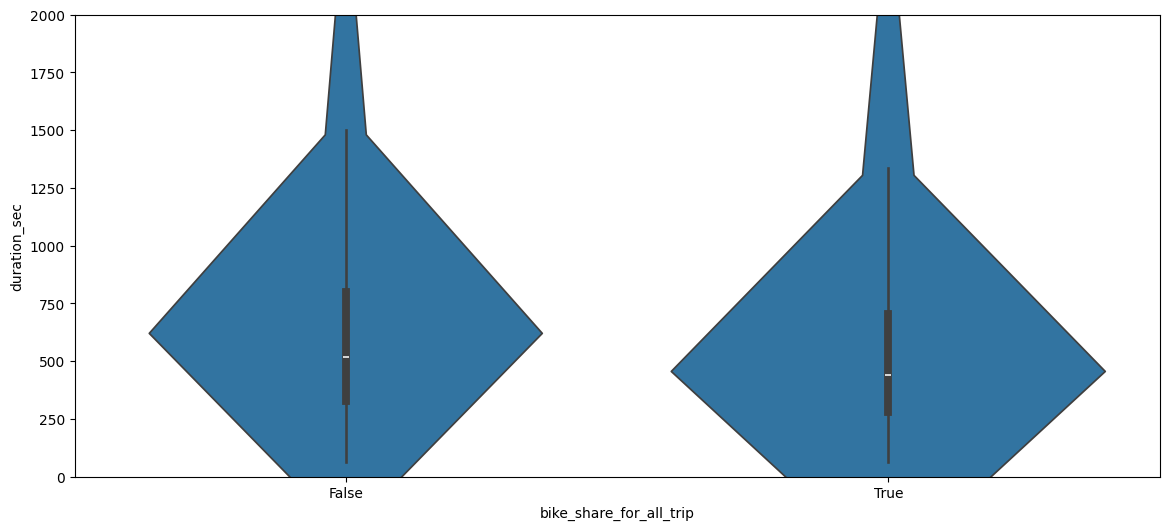

In [34]:
plt.figure(figsize=[14,6]);
ax = sns.violinplot(data=df,x='bike_share_for_all_trip',y='duration_sec');
ax.set_ylim(ymin = 0, ymax=2000); #only show the portion of interest

We can see that rides completed by people who are in the Bike Share for All program tend to be slightly shorter (by about 100 seconds or about 1.5 minutes on average) and have slightly less variance in length than the rides completed by people who aren't in the program. Both distributions are unimodal.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The distribution of rides by birth year is similar for both males and females, with the most rides completed by riders born around 1990, foro both males and females. However, the ration of rides completed by males to rides completed by females varies by birth year. The trend is towards a more equal ratio of the two most common genders, but that trend has tapered off or even reversed in more recent years.  
Both males and females tend to average about 8-10 minute rides, although the average for females is on the upper end of that, and there is more variability in the length of rides completed by females. Younger riders (those born in about 1970 or later) also tend to go on longer rides than older riders.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There doesn't seem to be a correlation between a member's gender and their status in the Bike Share for All program. However, the oldest and youngest riders have the highest rates of participation in the program, with most participants being born in the 1990s. Program participants also have slightly shorter ride durations on average.

## Multivariate Exploration

Look at the relationship between ride duration, gender, and participation in the Bike Share for All Program. Both gender and participation had relationships with ride duration, so it would be interesting to see the relationship between all three. 

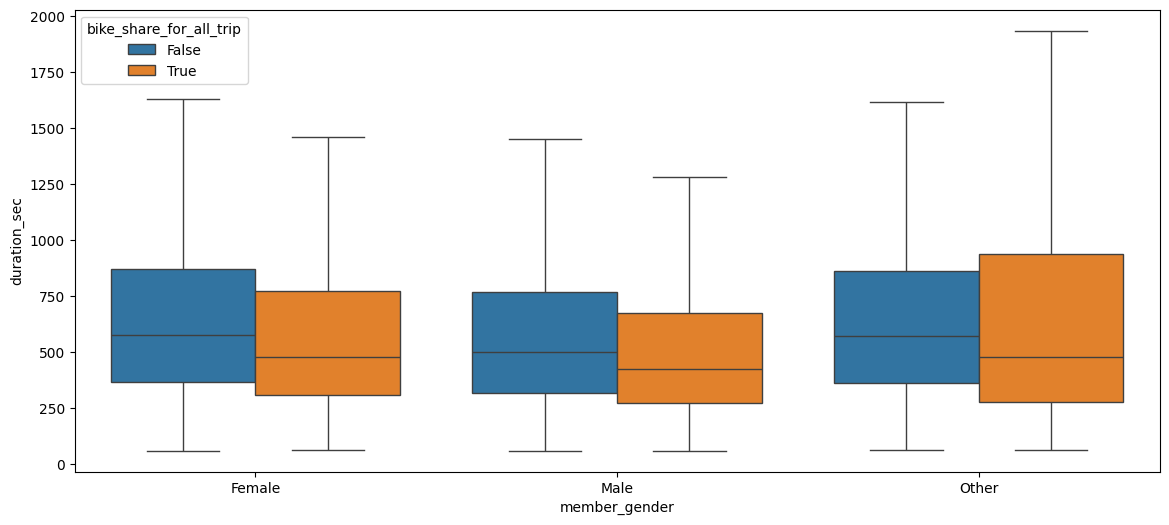

In [35]:
plt.figure(figsize=[14,6]);
sns.boxplot(data=df,x='member_gender',y='duration_sec',hue='bike_share_for_all_trip', showfliers=False);

We can see that the bivariate relationships build on each other, with male Bike Share for All participants having the lowest average trip duration and female riders who aren't in the Bike Share for All program having the highest average trip duration. The distribution of ride durations of female program participants and male non-participants is almost identical.

Now explore the relationship among birth year, trip duration, and participation in the Bike Share for All program.

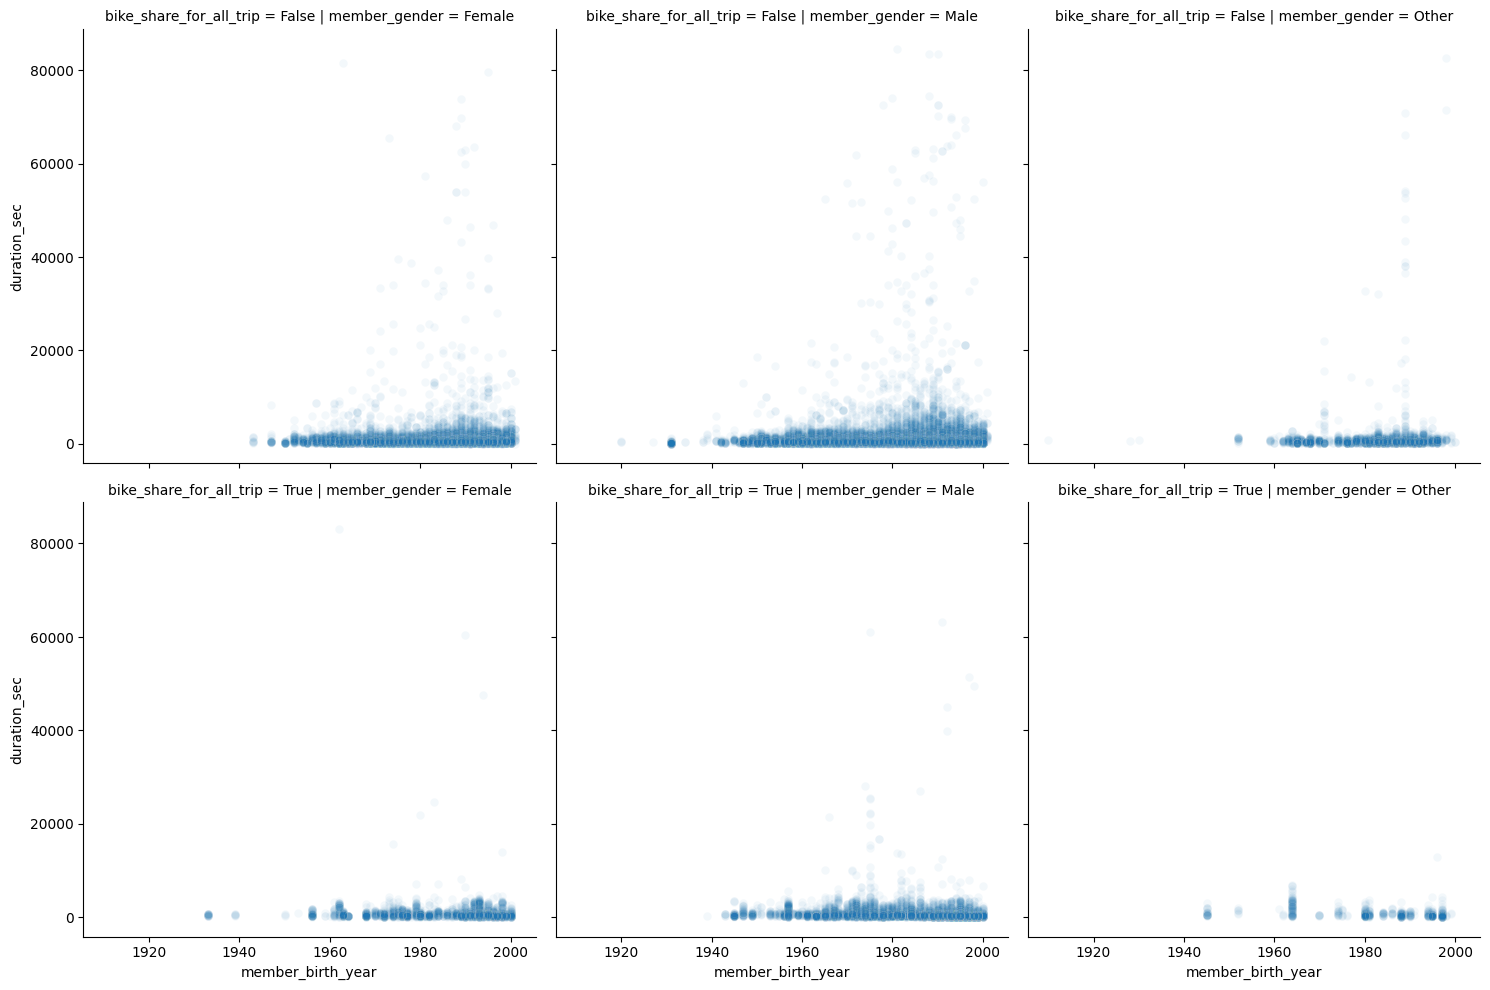

In [36]:
#Use relplot instead of FacetGrid in order to use transparency. relplot uses FacetGrid under the hood.
g = sns.relplot(data=df,col='member_gender',row='bike_share_for_all_trip',x='member_birth_year', y='duration_sec',alpha=1/20)

Now plot with a log scale on the y axis. When the trip duration alone was plotted with a log scale in the univariate analysis, the data appeared to be lognormal. Let's check if this holds for subgroups of rides.

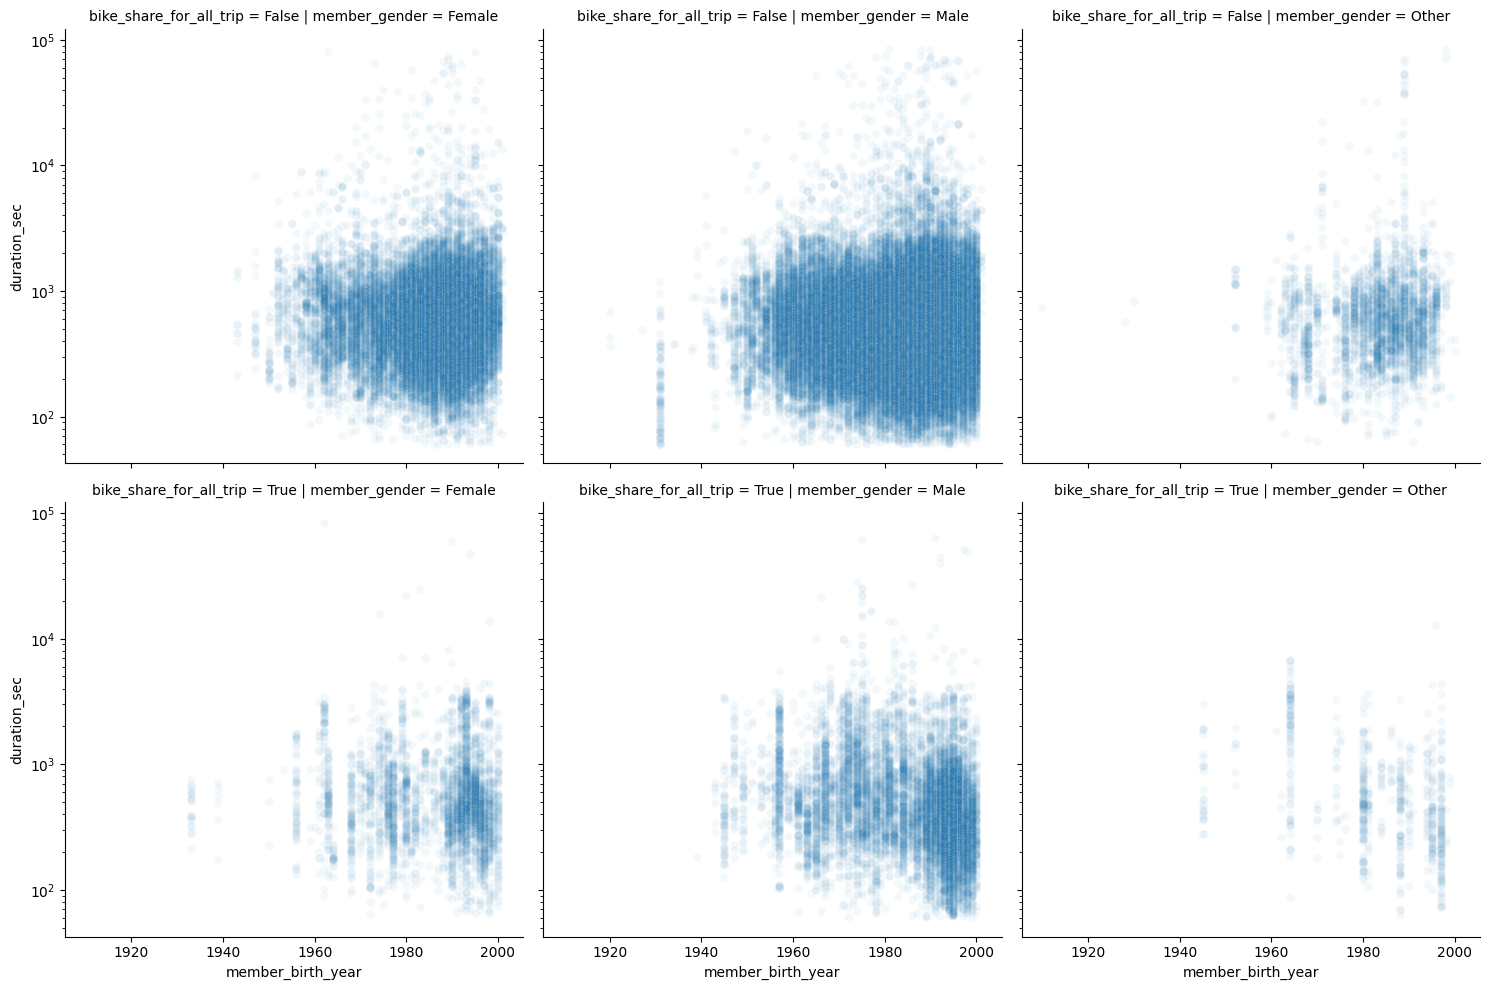

In [37]:
g = sns.relplot(data=df,col='member_gender',row='bike_share_for_all_trip',x='member_birth_year', y='duration_sec',alpha=1/20,facet_kws={"subplot_kws": {"yscale": "log"}})

When plotted by subgroup, the ride durations all seem to follow a similar distribution.

Now check by plotting all points on one axis with multiple encodings. Only plot a sampling of the points to avoid overplotting.

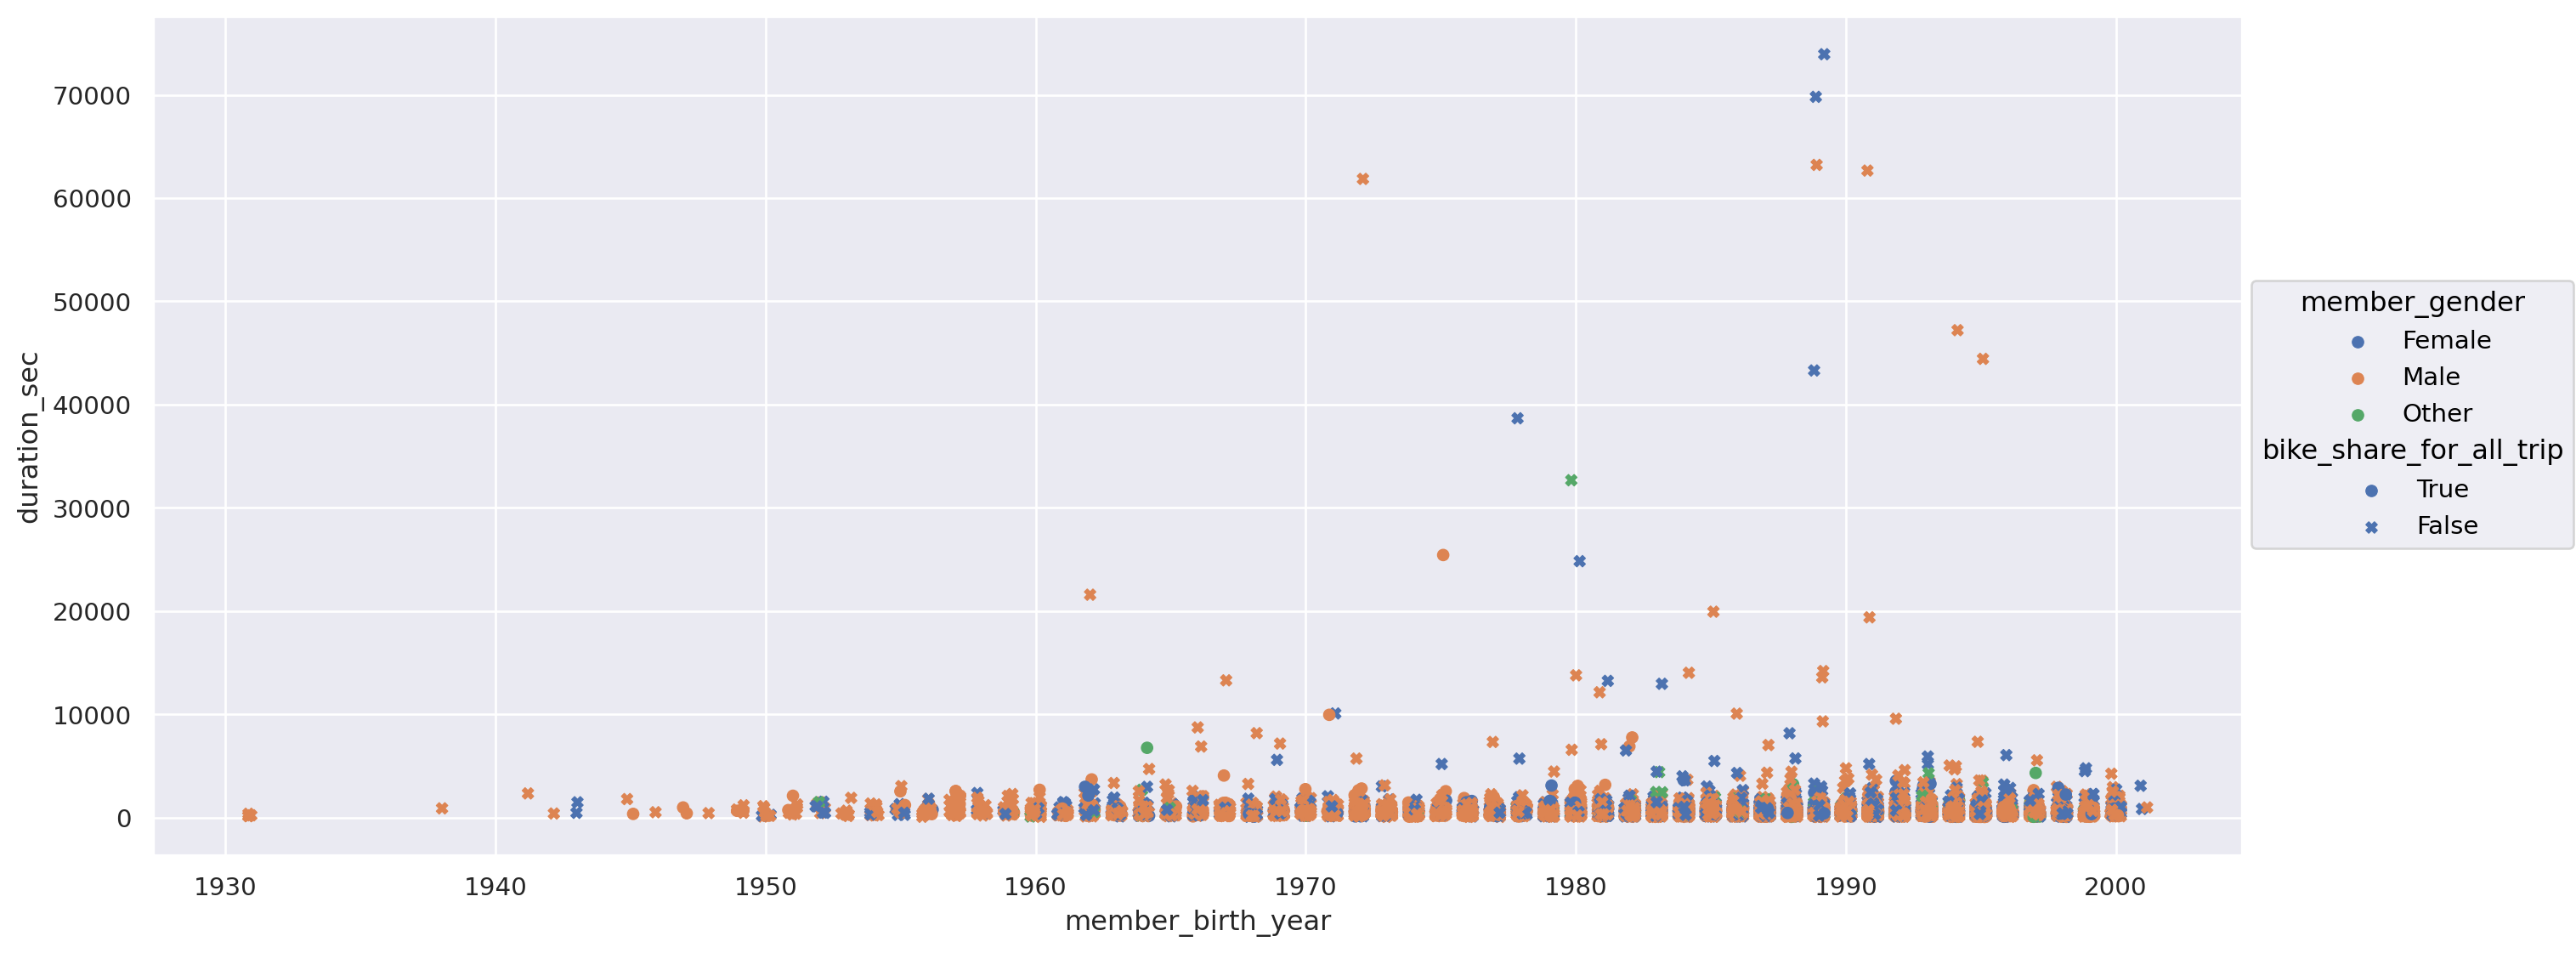

In [38]:
#Use seaborn object's Plot instead of a strip plot in order to use different markers as well as different colors and apply jitter
subset = df.sample(n=10000, random_state=8)
(
    so.Plot(data=subset, x='member_birth_year', y='duration_sec', color='member_gender', marker='bike_share_for_all_trip')
    .add(so.Dot(pointsize=5), so.Jitter(.5))
    .layout(size=(14,6))
)
#plt.figure(figsize=[14,6]);
#ax = sns.scatterplot(data=subset, x='member_birth_year', y='duration_sec', hue='member_gender', style='bike_share_for_all_trip')

Make the same plot again but with outliers (again calculated as those above the 95th percentile) removed.

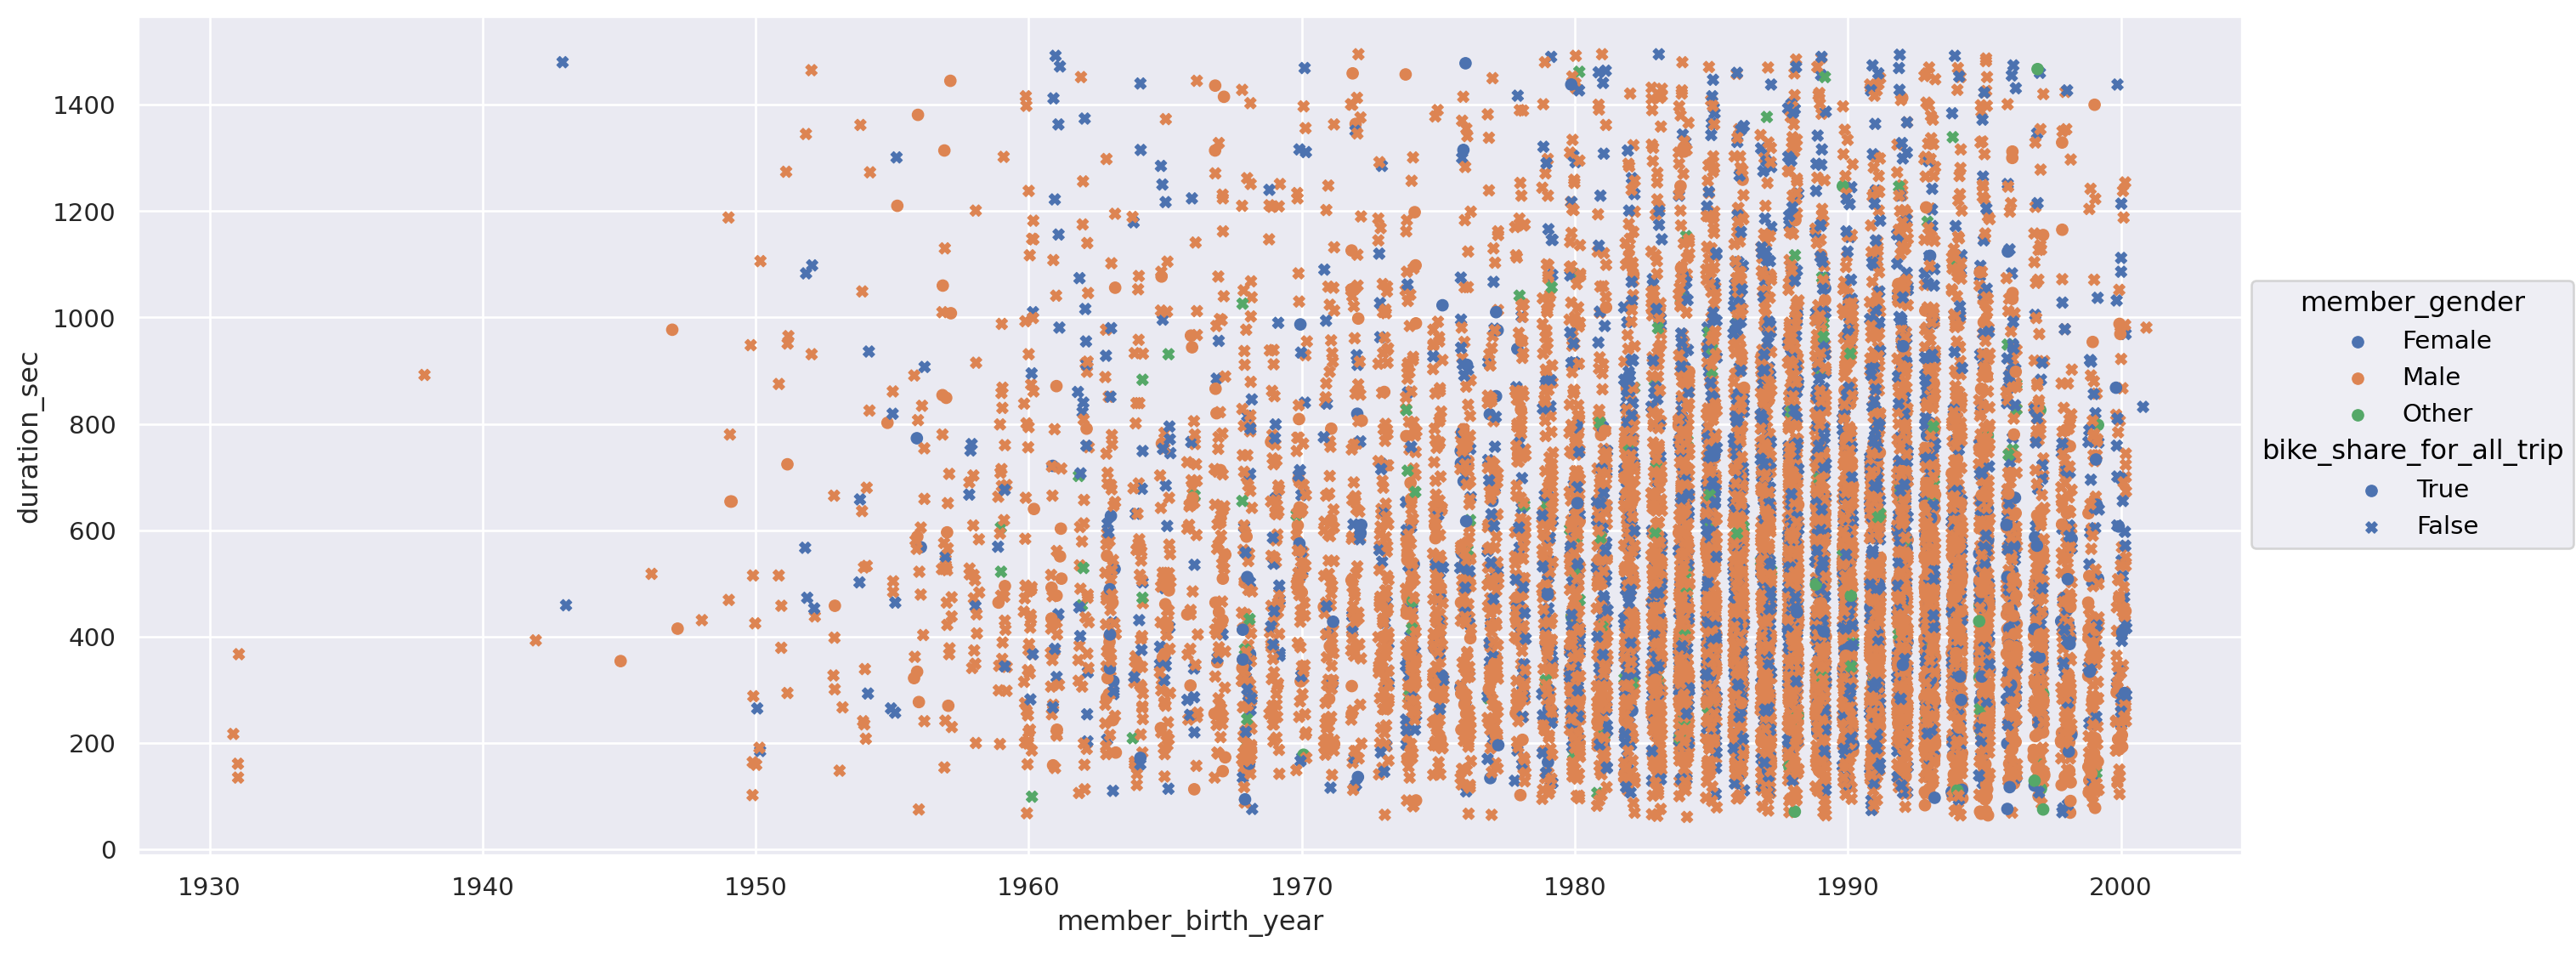

In [39]:
subset = df.sample(n=10000, random_state=8)
(
    so.Plot(data=subset[subset['duration_sec'] <= subset['duration_sec'].quantile(.95)], x='member_birth_year', y='duration_sec', color='member_gender', marker='bike_share_for_all_trip')
    .add(so.Dot(pointsize=5), so.Jitter(.5))
    .layout(size=(14,6))
)

Now plot with a regplot to see the line of best fit, but use only a sampling of the points so it doesn't take so long to plot. This will make it easier to see trends than the plot above. In the plots below, the focus is on the lines rather than on the points.

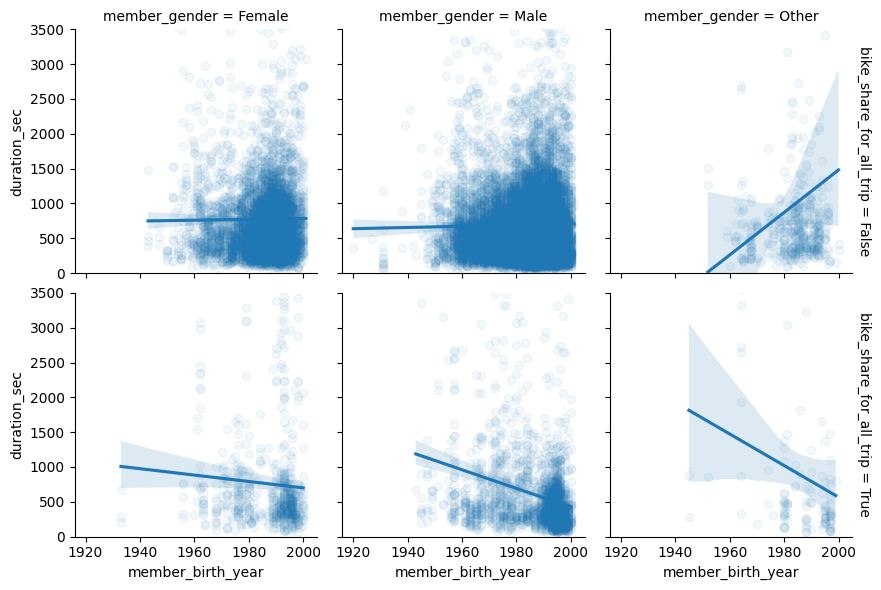

In [40]:
subset = df.sample(n=30000, random_state=8)
g = sns.FacetGrid(data=subset,col='member_gender',row='bike_share_for_all_trip',margin_titles=True)
g.map(sns.regplot,'member_birth_year', 'duration_sec',scatter_kws={'alpha': 1/20});
g.set(ylim=(0, 3500)); #Zoom in on the part of the graph that shows most of the points.

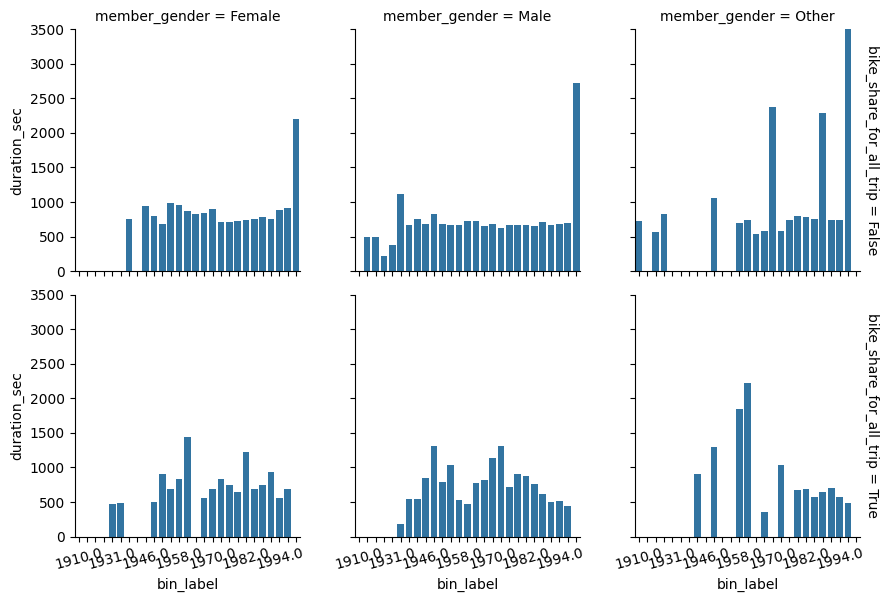

In [41]:
#divide birth years into bins
bin_edges = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+3, 3)
df['bin'] = pd.cut(df['member_birth_year'], bins=bin_edges, labels=False, include_lowest=True)
# calculate bin averages
bin_averages = df.groupby(['bin', 'member_gender','bike_share_for_all_trip'],observed=True)['duration_sec'].mean().reset_index()
bin_averages['bin_label'] = (bin_averages['bin']*3 + df['member_birth_year'].min()).astype(str)
bin_averages
g = sns.FacetGrid(data=bin_averages,col='member_gender',row='bike_share_for_all_trip',margin_titles=True)
g.map(sns.barplot,'bin_label', 'duration_sec',order=bin_averages['bin_label'].unique());
#make the labels less dense to improve readability
for ax in g.axes.flatten():
    labels = ax.get_xticklabels()
    for i, label in enumerate(labels):
        label.set_visible(i % 4 == 0)
        label.set_rotation(15)
#bin_averages[bin_averages['duration_sec'] == bin_averages['duration_sec'].max()]
g.set(ylim=(0, 3500)); #Zoom in on the part of the graph that shows most of the means. There are some very tall bars that are likely caused by a couple of outliers throwing off averages in the groups that have few data points.

We can see that while average ride duration is fairly constant among all ages of riders other than those born in the late 1990s for both males and females who are not part of the Bike Share for All program, it increases with rider age for both males and females who are part of it, with the most substantial increase seen in rides completed by male riders.  
We can also see that riders who are part of the Bike Share for All program and have gender "Other" have similar but more extreme trends in ride duration with relation to age. However, this could be due to the small number of rides in that subcategory.

Now look for which group is the smallest to help identify where there is the most room to grow the market. We also need data on incomes and how many people or what percentage of people are of gender "other" in order to know where there is the most room for growth.

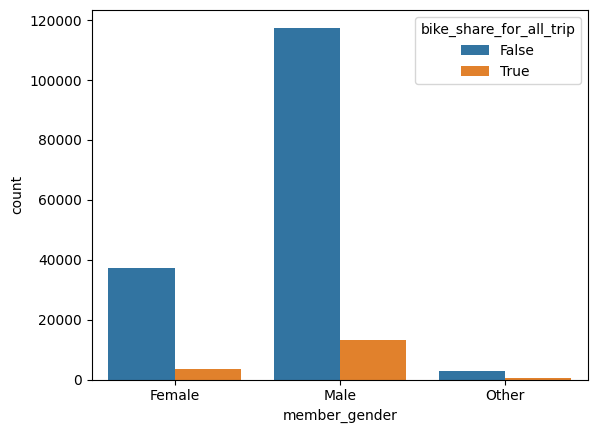

In [42]:
#This is a bivariate visualization, but I include it here so it is easier to compare it to the next multivariate 
#visualization which is similar but also includes the birth year.
sns.countplot(data=df, x="member_gender", hue="bike_share_for_all_trip");

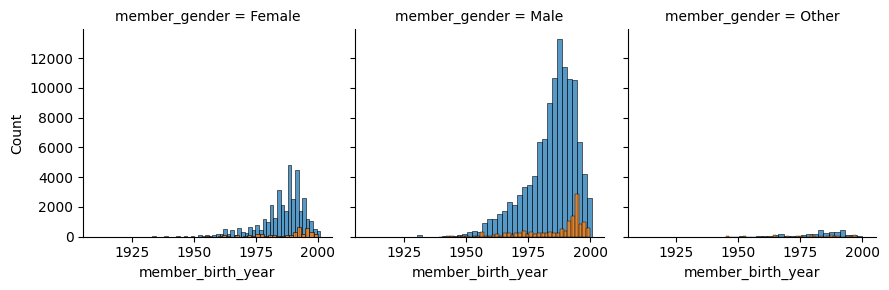

In [43]:
g = sns.FacetGrid(data=df,col='member_gender',hue='bike_share_for_all_trip')
g.map(sns.histplot,'member_birth_year',bins=40);

The trends hold across birth years, although with some variation in magnitude.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Being male and participating in the Bike Share for All program both are associated with shorter ride distances, and the effecct is cumulative.  
All subgroups have the most riders born in the 1990s, although the most common birth year is slightly later for those in the Bike Share for All program.
### Were there any interesting or surprising interactions between features?

The interactions we saw in the bivariate analyses hold when we look at multiple features at once.

## Conclusions
1. There are fewer than 4,000 rides completed by a rider with a gender labeled as "other."
2. There are more than 3 times as many rides completed by males than by females.
3. Most riders were born between 1980 and 2000, with the peak being around 1990.
4. The overall distribution of ride durations is approximately lognormal.
5. About 10% of rides were completed by riders in the Bike Share for All program.
6. The ratio of rides completed by males to rides completed by females decreases with later birth years, although it picks up slightly among riders born in the 1990s. A lower ratio indicates that there is less disparity between the number of rides completed by men and the number of rides completed by women. 
7. Rides completed by females were slightly longer, on average, than rides completed by males, but there was much more variance in their length. 
8. While most rides for all ages tend to be shorter, younger riders are more likely to go on long rides.
9. Rides completed by people who are in the Bike Share for All program tend to be slightly shorter (by about 100 seconds or about 1.5 minutes on average) and have slightly less variance in length than the rides completed by people who aren't in the program.
10. The bivariate relationships between gender and ride duration and between Bike Share for All participation and ride duration build on each other. 
11. While average ride duration is fairly constant among all ages of riders other than those born in the late 1990s for both males and females who are not part of the Bike Share for All program, it increases with rider age for both males and females who are part of the program, with the most substantial increase seen in rides completed by male riders.

In [44]:
#Save the data set so the wrangling process doesn't need to be repeated in the explanatory code.
df.to_csv('201902-fordgobike-tripdata_clean.csv',index=False)